In [1]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [3]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only required columns
df = df[['v1', 'v2']]

# Rename columns
df.columns = ['label', 'message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(df['message'])
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [11]:
def predict_sms(text):
    text_vector = tfidf.transform([text])
    prediction = model.predict(text_vector)
    return "Spam" if prediction[0] == 1 else "Ham"

print(predict_sms("Congratulations! You won a free iPhone"))
print(predict_sms("Hey, are we meeting today?"))

Spam
Ham


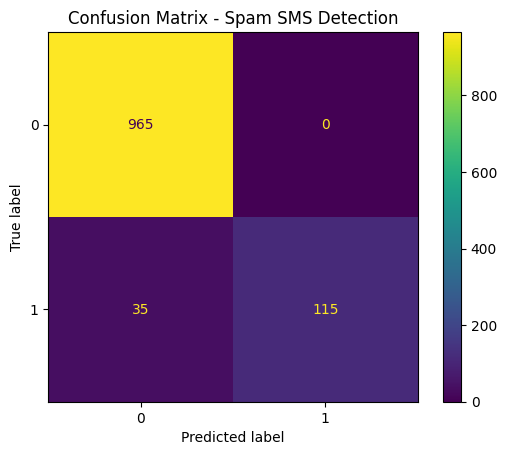

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix - Spam SMS Detection")
plt.show()

In [13]:
import pickle

# Save model
pickle.dump(model, open("spam_model.pkl", "wb"))

# Save vectorizer
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


In [14]:
from google.colab import files
files.download("spam_model.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>